In [1]:
# import required libraries for dataframe and visualization
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization

# Import any other libraries you may need
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy.stats import zscore #scale using zscore
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
# when you use 'yellowbrick', you need to install it before (!pip install yellowbrick)
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Loading csv file from: /kaggle.com/datasets/vatsalmavani/spotify-dataset/data_w_genres.csv
w_genres = pd.read_csv("C:/Users/Miki.AsusVivobook/project2/data_w_genres.csv")

In [3]:
# create a copy of the dataset w_genres
df2 = w_genres.copy()
df2 = df2.iloc[:28680]

# write to a csv file
df2.to_csv('df2.csv', index=0)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [4]:
# create X4 without 'genres', 'artists', 'duration_ms', 'key', 'mode' and 'count' (those are objects or no contribution features)
X4 = pd.DataFrame(df2.iloc[:, [2,3,5,6,7,8,9,10,11,12]].values)
col4 = df2.iloc[:, [2,3,5,6,7,8,9,10,11,12]].columns
X4.columns = col4
X4.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.590111,0.467222,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333
1,0.862538,0.441731,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923
2,0.856571,0.348286,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143
3,0.884926,0.425074,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852
4,0.510714,0.467143,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000


array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'popularity'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

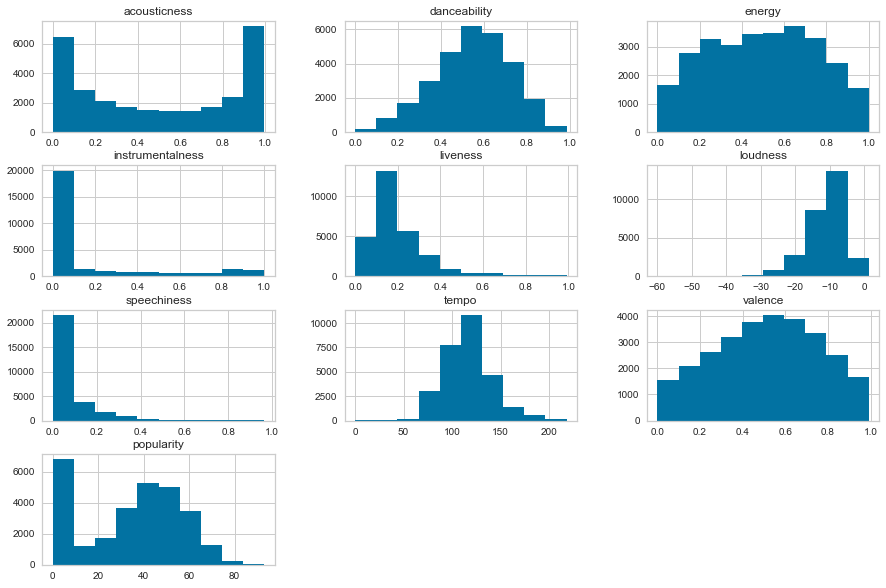

In [5]:
X4.hist(figsize=(15,10))

In [6]:
# preprocessing (Transform features by scaling each feature to a given range.)
scaler = StandardScaler()

scaled4 = pd.DataFrame(scaler.fit_transform(X4))
scaled4.columns = col4
scaled4.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.247535,-0.449184,-0.406013,-0.547439,0.627425,-0.573060,1.039205,0.066922,-0.504151,0.190936
1,0.982617,-0.593635,-0.355776,-0.313665,0.800493,0.078054,0.734007,-0.511957,-0.997712,-0.155703
2,0.966517,-1.123156,-0.827512,-0.503226,0.875523,-0.708674,0.218780,-1.538550,-0.645888,0.035583
3,1.043025,-0.688023,-0.987591,-0.339037,0.518455,-0.779478,0.260623,-1.086940,-0.575629,0.035346
4,0.033301,-0.449634,-0.036105,-0.554140,-0.052816,0.156590,0.040439,0.279603,-0.124530,0.399492
5,0.300001,-0.335536,-0.735963,-0.569906,0.513381,-1.234637,0.035789,0.112149,-0.291172,-0.057346
6,0.611501,0.512889,0.056936,0.037681,1.586862,-1.641559,1.035733,0.758864,1.523126,-1.522206
7,1.156552,1.062555,-0.092154,-0.330281,3.794394,0.103350,1.446505,0.677635,1.592679,-1.388134
8,-0.877551,0.659014,0.776463,-0.585475,-0.293433,0.237678,-0.084640,0.687361,0.976290,0.007533
9,0.124374,1.378754,0.139066,-0.508355,-0.157160,0.345002,1.783041,-0.139982,-0.131017,1.495903


In [7]:
# Use apply(zscore) to make sure that X3(with StandardScaler()) and zscore are the same.
X4_scaled_z =X4.apply(zscore)
X4_scaled_z.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.247535,-0.449184,-0.406013,-0.547439,0.627425,-0.573060,1.039205,0.066922,-0.504151,0.190936
1,0.982617,-0.593635,-0.355776,-0.313665,0.800493,0.078054,0.734007,-0.511957,-0.997712,-0.155703
2,0.966517,-1.123156,-0.827512,-0.503226,0.875523,-0.708674,0.218780,-1.538550,-0.645888,0.035583
3,1.043025,-0.688023,-0.987591,-0.339037,0.518455,-0.779478,0.260623,-1.086940,-0.575629,0.035346
4,0.033301,-0.449634,-0.036105,-0.554140,-0.052816,0.156590,0.040439,0.279603,-0.124530,0.399492
5,0.300001,-0.335536,-0.735963,-0.569906,0.513381,-1.234637,0.035789,0.112149,-0.291172,-0.057346
6,0.611501,0.512889,0.056936,0.037681,1.586862,-1.641559,1.035733,0.758864,1.523126,-1.522206
7,1.156552,1.062555,-0.092154,-0.330281,3.794394,0.103350,1.446505,0.677635,1.592679,-1.388134
8,-0.877551,0.659014,0.776463,-0.585475,-0.293433,0.237678,-0.084640,0.687361,0.976290,0.007533
9,0.124374,1.378754,0.139066,-0.508355,-0.157160,0.345002,1.783041,-0.139982,-0.131017,1.495903


In [8]:
scaled4 = scaler.fit_transform(X4)

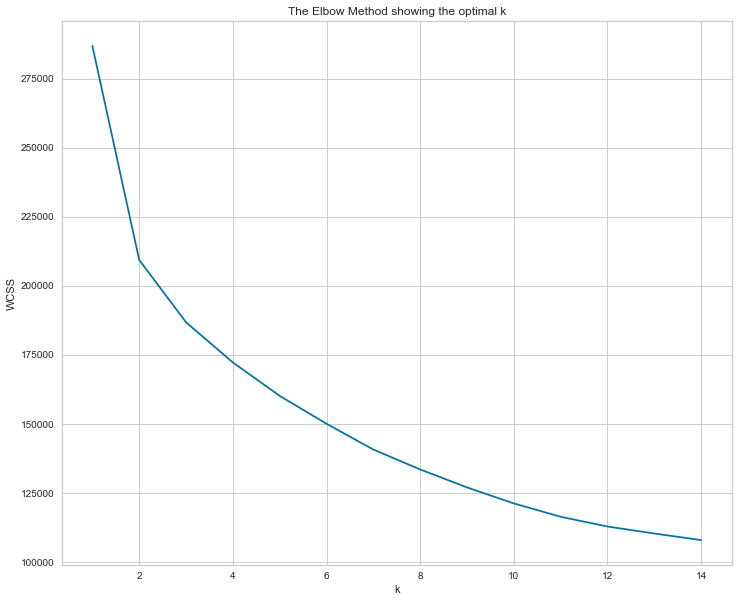

In [9]:
# Elbow method WCSS (Within-Cluster Sum of Square)
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled4)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,10))
plt.plot(range(1,15), wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2, the average silhouette score is 0.2696516233808969)
For n_clusters = 3, the average silhouette score is 0.21537229580254702)
For n_clusters = 4, the average silhouette score is 0.2101444721252117)
For n_clusters = 5, the average silhouette score is 0.155242566490715)
For n_clusters = 6, the average silhouette score is 0.15931166327666815)
For n_clusters = 7, the average silhouette score is 0.15247737941372116)
For n_clusters = 8, the average silhouette score is 0.1517877502526926)
For n_clusters = 9, the average silhouette score is 0.15460704209361056)


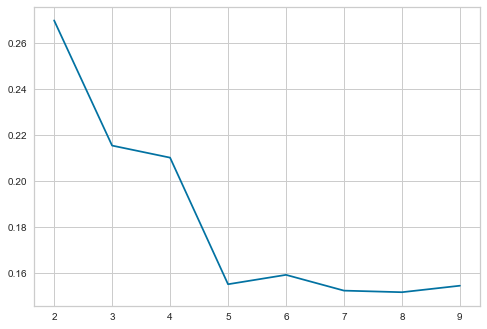

In [10]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((scaled4))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled4, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the average silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

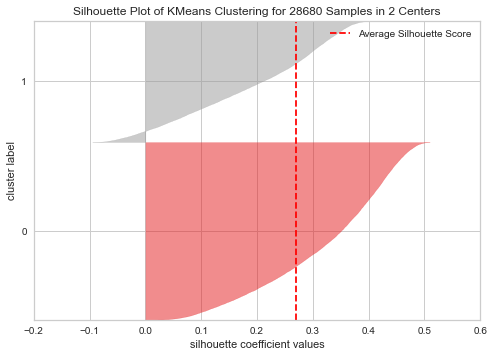

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 28680 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
# finding optimal no. of clusters with silhouette coefficients k=2
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(scaled4)
visualizer.show()

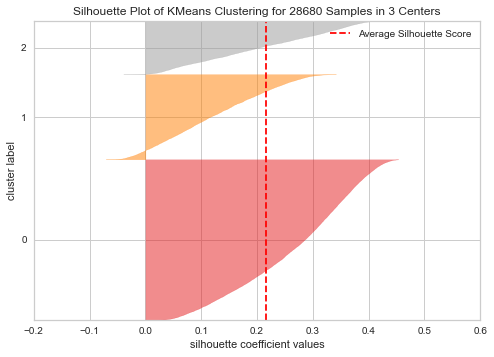

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 28680 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
# finding optimal no. of clusters with silhouette coefficients k=3
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(scaled4)
visualizer.show()

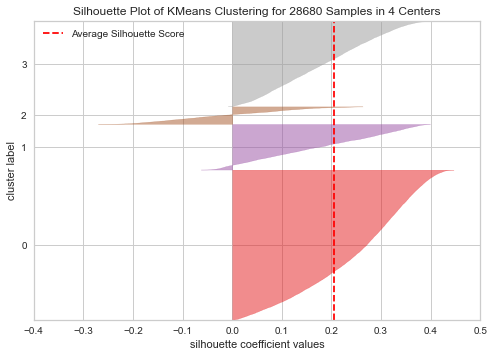

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 28680 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
# finding optimal no. of clusters with silhouette coefficients k=4
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(scaled4)
visualizer.show()

In [14]:
k3_df2 = df2.copy()
scaled_k3_df2 = scaled4.copy()

In [15]:
km = KMeans(n_clusters = 3, random_state = 1)

# inspect parameters
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

In [16]:
y_km = km.fit_predict(scaled_k3_df2)
clusters = km.cluster_centers_
km.cluster_centers_

array([[-0.78890427,  0.44319349,  0.7137461 , -0.31371778, -0.08929685,
         0.61188185,  0.03078108,  0.25528458,  0.24544982,  0.56187991],
       [ 0.84596897, -0.03130997, -0.57334234, -0.06432931,  0.2855736 ,
        -0.26683772,  0.19178146, -0.0855632 ,  0.30167047, -0.81891447],
       [ 1.02659951, -1.28418811, -1.23481678,  1.04685542, -0.18628975,
        -1.41663217, -0.39827724, -0.63209471, -1.21958271, -0.38633363]])

<IPython.core.display.Javascript object>


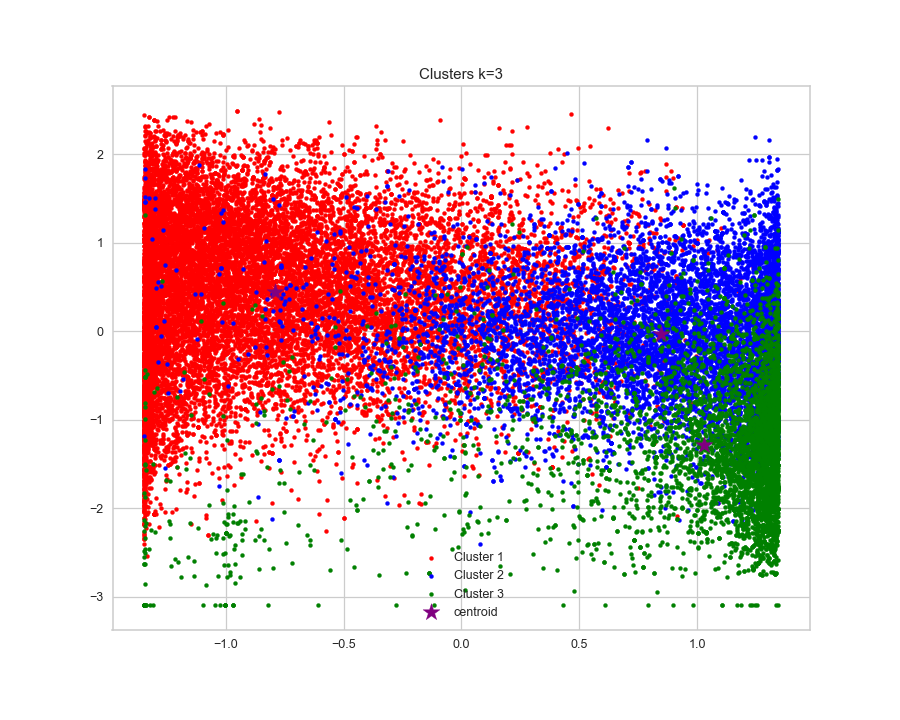

In [26]:
# visualization

fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(scaled_k3_df2[y_km == 0,0], scaled_k3_df2[y_km == 0,1], s = 10, color = 'red', label = 'Cluster 1')
plt.scatter(scaled_k3_df2[y_km == 1,0], scaled_k3_df2[y_km == 1,1], s = 10, color = 'blue', label = 'Cluster 2')
plt.scatter(scaled_k3_df2[y_km == 2,0], scaled_k3_df2[y_km == 2,1], s = 10, color = 'green', label = 'Cluster 3')

# Add the centroids to the plot 
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s = 200, color='purple',marker='*',label='centroid')
plt.title('Clusters k=3')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


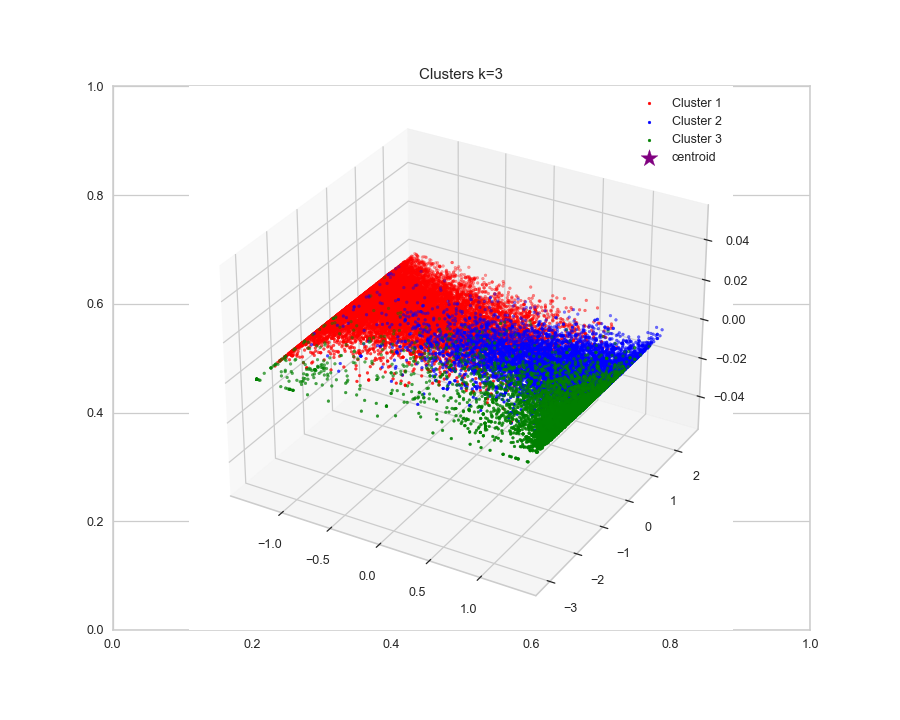

In [30]:
# visualization 3D (line2: include rotation)
# %matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(scaled_k3_df2[y_km == 0,0], scaled_k3_df2[y_km == 0,1], s = 5, color = 'red', label = 'Cluster 1')
plt.scatter(scaled_k3_df2[y_km == 1,0], scaled_k3_df2[y_km == 1,1], s = 5, color = 'blue', label = 'Cluster 2')
plt.scatter(scaled_k3_df2[y_km == 2,0], scaled_k3_df2[y_km == 2,1], s = 5, color = 'green', label = 'Cluster 3')

# Add the centroids to the plot 
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s = 200, color='purple',marker='*',label='centroid')
plt.title('Clusters k=3')
plt.legend()
plt.show()

Let's investigate the cluster with K=3 more in detail. First, we concatenate the cluster's numbers to the original dataframe (df2).

In [31]:
# make df with y_km
kmeans_df2 = pd.DataFrame(data=y_km, dtype=int)
kmeans_df2.columns = ['cluster_index']

kmeans_df2.shape

(28680, 1)

In [33]:
kmeans_df2.head(20)

,cluster_index
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,1
8,0
9,0


In [34]:
# count numbers of the cluster_index
kmeans_df2['cluster_index'].value_counts()

0    15404
1     8170
2     5106
Name: cluster_index, dtype: int64

In [35]:
# concatenate the cluster_index column to the dataframe (df2)
df2 = pd.concat([df2, kmeans_df2], axis = 1)

df2.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,cluster_index
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9,1
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26,1
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7,1
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27,1
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7,0


In [36]:
# 10 examples of the songs in the cluster_index 0 (cluster 1 red)
df2.loc[df2['cluster_index'] == 0][: 10]

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,cluster_index
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7,0
8,"['comedy rock', 'comic', 'parody']","""Weird Al"" Yankovic",0.173145,0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122,0
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",$NOT,0.544467,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15,0
10,"['dark trap', 'meme rap']",$atori Zoom,0.239000,0.883000,141519.000000,0.625000,0.000000,0.076500,-4.098000,0.245000,126.677000,0.871000,67.000000,6,1,2,0
11,[],$pyda,0.000122,0.514000,331240.000000,0.899000,0.079300,0.367000,-5.115000,0.060200,174.028000,0.266000,59.000000,7,1,1,0
12,"['asian american hip hop', 'cali rap', 'west c...",$tupid Young,0.148100,0.854000,190572.000000,0.683000,0.000002,0.188500,-6.997000,0.221000,100.724500,0.625500,57.500000,1,1,2,0
13,"['dark trap', 'new orleans rap', 'underground ...",$uicideBoy$,0.141485,0.749344,146386.392000,0.635552,0.045675,0.202253,-6.631304,0.156108,115.022024,0.287286,61.800000,1,1,125,0
14,"['broadway', 'show tunes']",'In The Heights' Original Broadway Company,0.624769,0.563615,314023.615385,0.457692,0.000009,0.204385,-8.338462,0.152454,117.006846,0.467538,47.692308,7,1,13,0
17,"['boston rock', 'dance rock', 'new romantic', ...",'Til Tuesday,0.105556,0.557125,255213.500000,0.612250,0.023300,0.127587,-9.638125,0.032150,103.080250,0.532625,34.625000,0,1,16,0
19,[],(Con La Participación de Marc Anthony),0.538000,0.731000,361440.000000,0.794000,0.000024,0.073600,-4.182000,0.040800,88.003000,0.873000,43.000000,5,1,2,0


In [37]:
# 10 examples of the songs in the cluster_index 1 (cluster 2 blue)
df2.loc[df2['cluster_index'] == 1][: 10]

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,cluster_index
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9,1
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26,1
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7,1
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27,1
5,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.609556,0.487278,205091.944444,0.309906,0.004696,0.274767,-18.266389,0.098022,118.648944,0.441556,32.777778,5,1,36,1
6,[],"""Mama"" Helen Teagarden",0.725000,0.637000,135533.000000,0.512000,0.186000,0.426000,-20.615000,0.210000,134.819000,0.885000,0.000000,8,1,2,1
7,[],"""Test for Victor Young""",0.927000,0.734000,175693.000000,0.474000,0.076200,0.737000,-10.544000,0.256000,132.788000,0.902000,3.000000,10,1,2,1
15,"['broadway', 'hollywood', 'show tunes']",'Legally Blonde' Ensemble,0.553889,0.648444,304211.888889,0.441111,0.000025,0.214667,-11.459778,0.495111,114.808444,0.524778,48.666667,2,1,9,1
16,['show tunes'],'Legally Blonde' Greek Chorus,0.604500,0.773500,361780.000000,0.309500,0.000000,0.222200,-12.669000,0.289000,105.700000,0.596500,48.000000,10,1,2,1
40,[],1776 Ensemble,0.891500,0.589500,193206.500000,0.402500,0.000000,0.472500,-11.348500,0.172000,97.403500,0.594000,23.000000,0,1,2,1


In [38]:
# 10 examples of the songs in the cluster_index 2 (cluster 3 green)
df2.loc[df2['cluster_index'] == 2][: 10]

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,cluster_index
18,"['experimental hip hop', 'indie r&b', 'indie s...",((( O ))),0.847000,0.410000,311837.000000,0.169000,0.003270,0.117000,-11.422000,0.048500,89.494000,0.208000,67.000000,3,1,2,2
32,"['adult standards', 'ballroom', 'easy listenin...",101 Strings Orchestra,0.588875,0.292525,173106.375000,0.397000,0.714538,0.195375,-13.496375,0.037975,100.623125,0.391525,27.000000,0,1,16,2
36,['classical piano duo'],12 Pianists,0.991000,0.414000,137733.000000,0.018700,0.892000,0.051300,-39.385000,0.055700,74.477000,0.195000,52.000000,7,1,2,2
58,['new age'],2002,0.905000,0.229000,267840.333333,0.155000,0.852333,0.105267,-19.014333,0.035533,114.312000,0.063333,48.333333,7,1,6,2
115,['white noise'],520Hz,0.996000,0.000000,197680.000000,0.019700,0.996000,0.104000,-47.190000,0.000000,0.000000,0.000000,57.000000,1,1,2,2
138,['lo-fi beats'],90sFlav,0.952000,0.748000,126250.000000,0.265000,0.917000,0.086600,-12.074000,0.229000,77.009000,0.140000,70.000000,8,0,2,2
162,"['chillhop', 'lo-fi beats']",A L E X,0.833667,0.792667,169956.333333,0.285667,0.922333,0.102833,-12.981333,0.063733,124.990667,0.316000,62.666667,0,1,3,2
174,[],A Tree Grows in Brooklyn Orchestra,0.915000,0.261000,302533.000000,0.379000,0.845000,0.146000,-10.377000,0.034200,111.529000,0.269000,1.000000,3,1,1,2
177,"['ambient', 'chamber psych', 'compositional am...",A Winged Victory for the Sullen,0.767000,0.080400,266840.000000,0.083600,0.853000,0.119000,-21.007000,0.040000,82.140000,0.049800,46.000000,11,1,2,2
203,[],A.C. Smyth,0.983000,0.118000,106693.000000,0.077500,0.002970,0.104000,-22.774000,0.031400,169.421000,0.394000,9.000000,4,1,1,2
